# Scrape data of Database of Modern Exhibitions (DoME)



## Imports

In [48]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
import re
import json

## Load Artists

In [49]:
person = pd.read_excel("Person.xlsx")

## Functions

In [53]:
def get_page_name(wikidata_id):
    with urllib.request.urlopen('https://www.wikidata.org/wiki/Special:EntityData/' + wikidata_id + '.json') as url:
        data = json.loads(url.read().decode())
    page_name = data['entities'][wikidata_id]['labels']['en']['value']
    return page_name

def get_pageview_by_name(page_name):    
    html_page_name = urllib.parse.quote(page_name)
    print(html_page_name)
    name_string = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/' + html_page_name + '/monthly/19800101/20200601'
    try:
        with urllib.request.urlopen(name_string) as url:
            data = json.loads(url.read().decode())
        page_views = []
        for item in data['items']:
            page_views.append(int(item['views']))
    except:
        page_views = 0
    return page_views

## Scrape data
This code takes the id from the artists table and uses a url to download informations about all exhibitions this particular artist had been attending. 
It also scrapes data of the total number of cities and countries that particular artist attended.

In [54]:
artist = {}
for index, row in person.iterrows():
    print("{0} - Now at Artist: {1}".format(index, row["Name"]))
    artistInfo = {}
    id = row["ID"]
    artistInfo["id"] = id
    export = pd.read_excel("https://exhibitions.univie.ac.at/person/" + str(id) + "/exhibition/csv")
    cities = Counter(export["City"].tolist())
    # print(cities)
    artistInfo["cities"] = cities
    artistInfo["gender"] = row["Gender"]
    artistInfo["nExhibitions"] = row["# Exhibitions"]
    artist[row["Name"]] = artistInfo
    pageName = get_page_name(row["Wikidata"])
    pageViews = get_pageview_by_name(pageName)
    artistInfo["PageViews"] = np.mean(pageViews)
    # Gets cities and countries
    url = "https://exhibitions.univie.ac.at/person/" + str(id)
    print("Reading URL")
    opener = urllib.request.urlopen(url)
    print("URL finished loading")
    content = opener.read()
    soup = BeautifulSoup(content,'lxml')
    supa = soup.findAll("div", { "class" : "artist-information-text-stats" })
    exPerCountry = supa[-2] # exhibitions per country
    exPerCity = supa[-1] # exhibitions per city
    exPerCountryText = exPerCountry.get_text()
    exPerCityText = exPerCity.get_text()
    nExPerCountry = re.sub('\D', '', exPerCountryText)
    nExPerCity = re.sub('\D', '', exPerCityText)
    artistInfo["exhibitions per country"] = nExPerCountry
    artistInfo["exhibitions per city"] = nExPerCity
    if index > 99:
        break
    

0 - Now at Artist: Renoir, Pierre-Auguste
Pierre-Auguste%20Renoir
Reading URL
URL finished loading
1 - Now at Artist: Cézanne, Paul
Paul%20C%C3%A9zanne
Reading URL
URL finished loading
2 - Now at Artist: Gogh, Vincent van
Vincent%20van%20Gogh
Reading URL
URL finished loading
3 - Now at Artist: Bonnard, Pierre
Pierre%20Bonnard
Reading URL
URL finished loading
4 - Now at Artist: Vuillard, Edouard
%C3%89douard%20Vuillard
Reading URL
URL finished loading
5 - Now at Artist: Monet, Claude
Claude%20Monet
Reading URL
URL finished loading
6 - Now at Artist: Pissarro, Camille
Camille%20Pissarro
Reading URL
URL finished loading
7 - Now at Artist: Liebermann, Max
Max%20Liebermann
Reading URL
URL finished loading
8 - Now at Artist: Matisse, Henri
Henri%20Matisse
Reading URL
URL finished loading
9 - Now at Artist: Manet, Edouard
%C3%89douard%20Manet
Reading URL
URL finished loading
10 - Now at Artist: Denis, Maurice
Maurice%20Denis
Reading URL
URL finished loading
11 - Now at Artist: Hübner, Ulrich


## Cleanup of the table

In [55]:
del person["Status"]

In [56]:
person = person.drop(person.index[101:])

## Reformat city and country data

In [60]:
allExPerCity = []
allExPerCountry = []
allPageViews = []
for item in artist:
    allExPerCountry.append(int(artist[item]["exhibitions per country"]))
    allExPerCity.append(int(artist[item]["exhibitions per city"]))
    allPageViews.append(int(artist[item]["PageViews"]))
    
person["Exhibitions per country"] = allExPerCountry
person["Exhibitions per city"] = allExPerCity
person["Page views"] = allPageViews

## Get a unique list of all cities visited by the artists and fill number of visits for each city

In [61]:
allCities = []
for entry in artist:
    allCities += (list(artist[entry]["cities"].keys()))
    
uniqueCities = np.unique(allCities)
for city in uniqueCities:
    cityList = []
    for index, row in person.iterrows():
        cityList.append(artist[row["Name"]]["cities"][city])
    person[city] = cityList



## Save data to XLSX

In [62]:
person.to_excel("overview.xlsx")
person.to_hdf("overview.h5", key='df')

In [ ]:
fig, axes = plt.subplots(figsize=(30,2))
barHeight = artist["Renoir, Pierre-Auguste"]["cities"].values()
barString = artist["Renoir, Pierre-Auguste"]["cities"].keys()
axes.bar(barString, barHeight)
plt.savefig("beispiel.png", format="png")

In [7]:
# person = pd.read_hdf('mareisDaten.h5')
person['Name']
with urllib.request.urlopen('https://www.wikidata.org/wiki/Special:EntityData/Q39931.json') as url:
    data = json.loads(url.read().decode())

In [11]:
data['entities']['Q39931']['labels']['en']['value']

'Pierre-Auguste Renoir'

In [52]:
data = get_pageview_by_name('Theo von Brockhusen')

Theo%20von%20Brockhusen


HTTPError: HTTP Error 404: Not Found

<BarContainer object of 59 artists>

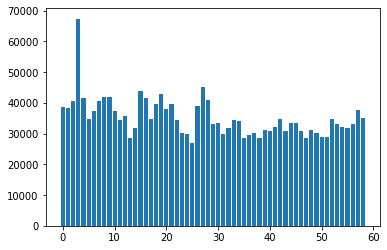

In [45]:
np.mean(data)
plt.bar(np.arange(0, len(data)), data)

In [43]:
len(data)


59

In [41]:
np.arange(1,len(data))[0]

1